In [2]:
from json import loads
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import json

In [ ]:
POSTS_PATH = "../../2.NerSaLang/Post_Analysis.json"
POST_PATH = "../SaNerGoodClusters.json"

In [3]:
df = pd.read_csv('GoodClusters.csv')  # Replace 'your_data.csv' with your actual file path

# Separate data by class label
cl0_ids = df[df['Cluster Label'] == -1][['Image ID']].values.tolist()
cl1_ids = df[df['Cluster Label'] == 0][['Image ID']].values.tolist()
cl2_ids = df[df['Cluster Label'] == 1][['Image ID']].values.tolist()
cl0_ids = [item for sublist in cl0_ids for item in sublist]
cl1_ids = [item for sublist in cl1_ids for item in sublist]
cl2_ids = [item for sublist in cl2_ids for item in sublist]
cl0 = []
cl1 = []
cl2 = []
with open(POSTS_PATH, 'r') as input_file:
    for line in input_file:
        post = json.loads(line)
        if post["_id"] in cl0_ids:
            cl0.append(post)
        elif post["_id"] in cl1_ids:
            cl1.append(post)
        elif post["_id"] in cl2_ids:
            cl2.append(post)


In [5]:
polarity = []
lang = []
for post in cl2:
        if post["sentiment"] == {}:
            polarity.append('NA')
        elif post["sentiment"] == 'ERR':
            polarity.append('NA')
        else:
            polarity.append(post["sentiment"])
        lang.append(post["lang"])

# Nº de P, N, NEU


In [6]:
for i in polarity:
    if type(i) is not str:
        print(i)
        print(type(i))

In [7]:
PolCounter = Counter(polarity)
for pol, count in PolCounter.items():
    print(f"{pol}: {count}")

Negative: 879


In [8]:
print(set(polarity))

{'Negative'}


# PIECHART con %

dict_keys(['Negative'])


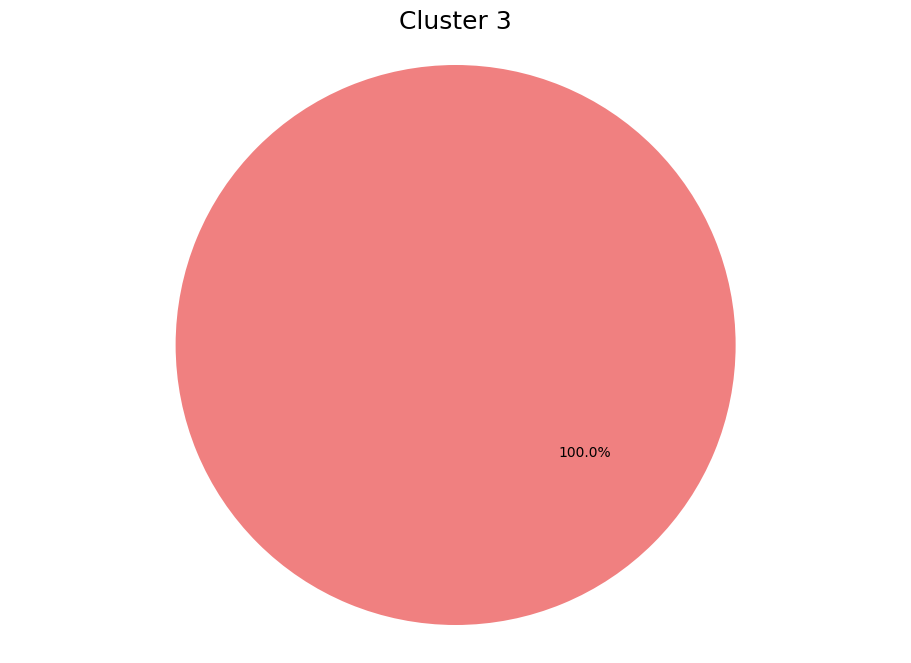

In [15]:
labels = PolCounter.keys() 
print(labels)
counts = PolCounter.values()
labels = ["Negative", "Neutral", "Positive", "NA"]

colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 
# Create the pie chart
plt.figure(figsize=(11.5, 8))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Cluster 3",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(labels, title="Polarity", loc="upper left",fontsize=16)# bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.show()

# Lang stats

In [10]:
lang

['es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',
 'es',

In [11]:
lang = list(map(lambda x: x.replace('sl', 'es'), lang))
lang = list(map(lambda x: x.replace('tl', 'es'), lang))
lang = list(map(lambda x: x.replace('lv', 'es'), lang))
lang = list(map(lambda x: x.replace('', 'none'), lang))


In [12]:
print(f"Languages: {set(lang)}")
langCounter = Counter(lang)
for idiom, count in langCounter.items():
    print(f"{idiom}: {count}")

Languages: {'noneenonesnone'}
noneenonesnone: 879


In [13]:
labels = ['Spanish', 'Italian', 'Portuguese', 'English', 'None']

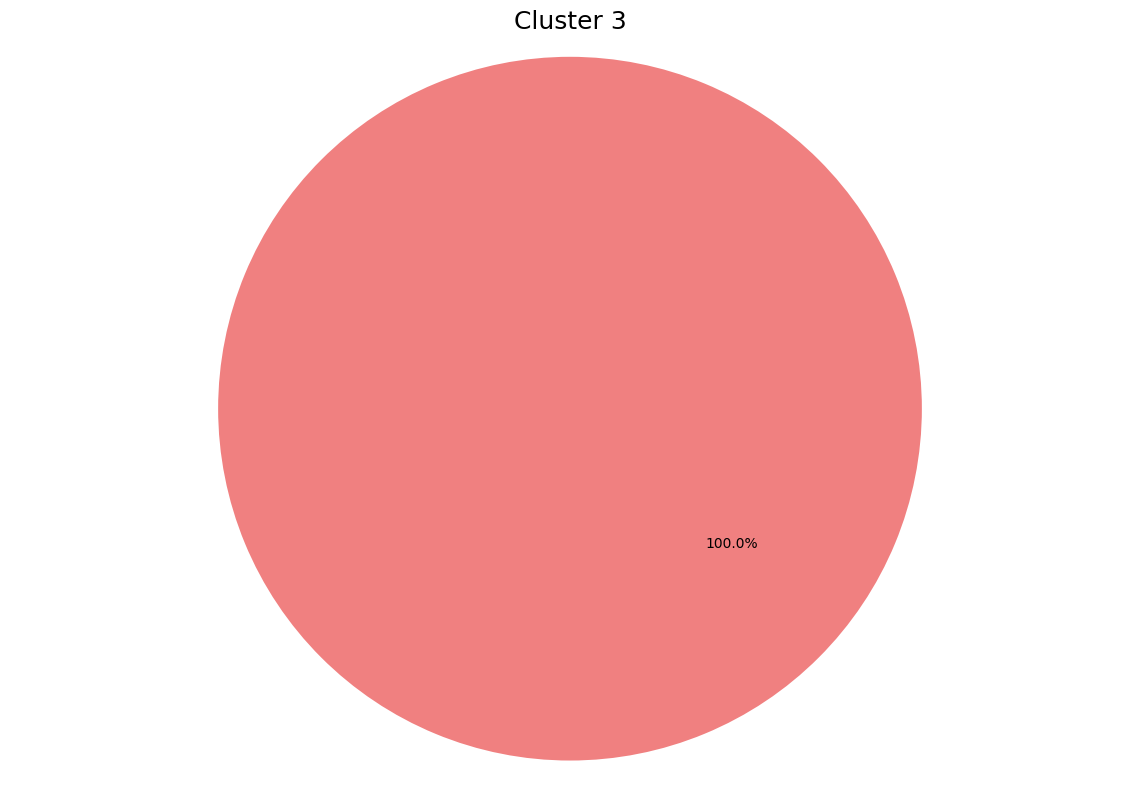

In [14]:
labels = PolCounter.keys() 
counts = PolCounter.values()
labels = ["Negative", "Positive", "Neutral", "NA"]

colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 
# Create the pie chart
plt.figure(figsize=(11.5, 8))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Cluster 3",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(labels, title="Polarity", loc="upper left",fontsize=16)# bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.tight_layout()

plt.show()